# 1. Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

# 2. Load the data

In [6]:
data = pd.read_csv('./train_data.csv', delimiter=',', index_col=0)

# 3. Check the data

## 3.1. Basic check

In [238]:
data.head()

,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,,
1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [239]:
data.shape

(59966, 15)

## 3.2. Check if the data types are all right

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

In [4]:
data.describe()

,ID,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,29983.500000,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,17310.837458,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,1.000000,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,14992.250000,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,29983.500000,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,44974.750000,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,59966.000000,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


## 3.3. Check if there are any NaNs

In [241]:
pd.isna(data).sum()

HealthServiceArea               0
Gender                          0
Race                            0
TypeOfAdmission                 0
CCSProcedureCode                0
APRSeverityOfIllnessCode        0
PaymentTypology                 0
BirthWeight                     0
EmergencyDepartmentIndicator    0
AverageCostInCounty             0
AverageChargesInCounty          0
AverageCostInFacility           0
AverageChargesInFacility        0
AverageIncomeInZipCode          0
LengthOfStay                    0
dtype: int64

# 4. Remove the "HealthServiceArea" attribute

In [7]:
# HealthServiceArea is not a attribute, drop it.
data.drop('HealthServiceArea', axis=1, inplace=True)

# 5. Transform "LengthOfStay" attribute into a binary class

In [8]:
data['LengthOfStay'] = (data['LengthOfStay'] >= 4).astype(int)

# 6. EDA and data preprocessing

## 6.1. Show data distribution

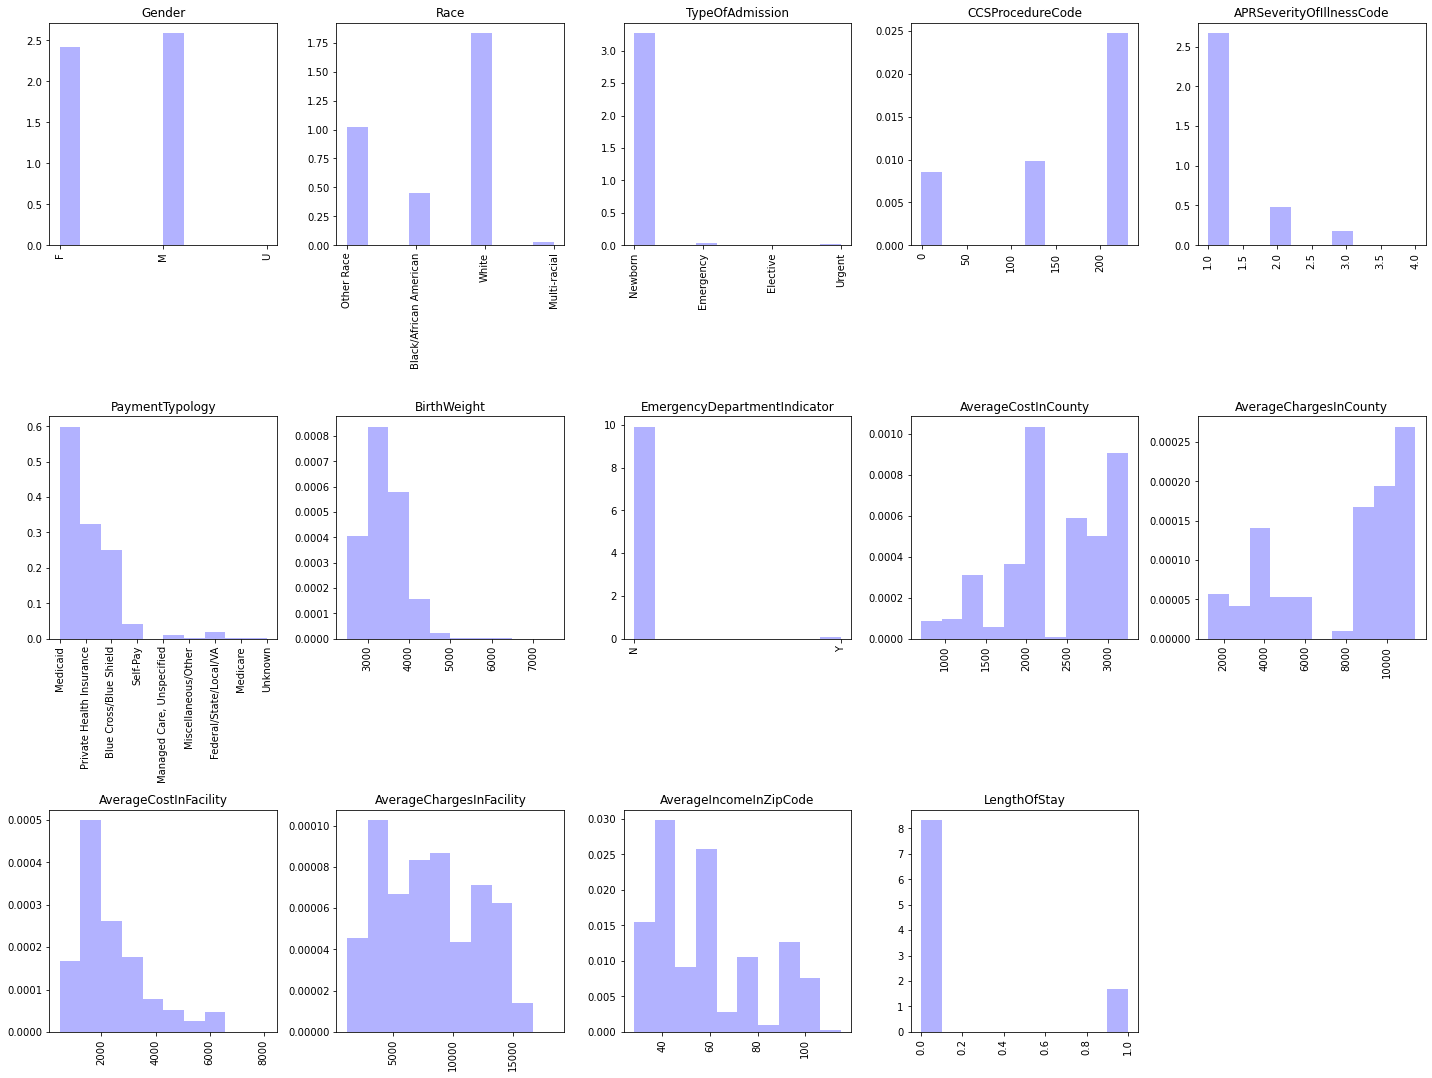

In [251]:
plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(4,5,i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
plt.tight_layout()

From above distribution graphs, we can see that:
1. The distribution of some attributes are skewd such as "AverageCostInFacility" and "AverageIncomeInZipCode".
2. Some attributes have imbalanced value distribution such as "TypeOfAdmission", "EmergencyDepartmentIndicator" and "LengthOfStay".
3. The Gender attribute has a anomoly.

## 6.2. Remove the anomoly from the "Gender" attribute

In [9]:
data.drop(data[data['Gender']=='U'].index, axis=0, inplace=True)

## 6.3. Downsample the data set to solve the problem of imbalanced distribution
Because the data set has enough amount of records to complete the process of building a model.

In [10]:
# The code is from elitedatascience.com [1]

# Separate majority and minority classes
majority = data[data['LengthOfStay']==0]
minority = data[data['LengthOfStay']==1]
 
# Downsample majority class
majority_downsampled = resample(majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=minority.shape[0],     # to match minority class
                                 random_state=0) # reproducible results
 
# Combine minority class with downsampled majority class
downsampled = pd.concat([majority_downsampled, minority])
 
# Display new class counts
downsampled['LengthOfStay'].value_counts()

1    10070
0    10070
Name: LengthOfStay, dtype: int64

## 6.4. Transformation
This notebook only tried to transform the two below attributes because the transformation of those two attributes can help improve the performance while others don't.

In [11]:
transform_attributes = ['AverageCostInFacility', 'AverageIncomeInZipCode']
powertransformer = PowerTransformer(standardize=False).fit(data.loc[:, transform_attributes])
data.loc[:, transform_attributes] = powertransformer.transform(data.loc[:, transform_attributes])

## 6.5. Show data distributions categoried by the "LengthOfStay" attribute

In [14]:
nominal_attributes = ['Gender','Race','TypeOfAdmission','CCSProcedureCode','APRSeverityOfIllnessCode', 'PaymentTypology', 'EmergencyDepartmentIndicator']
numerical_attributes = list(set(data.drop('LengthOfStay', axis=1).columns).difference(set(nominal_attributes)))

### 6.5.1. Count plot

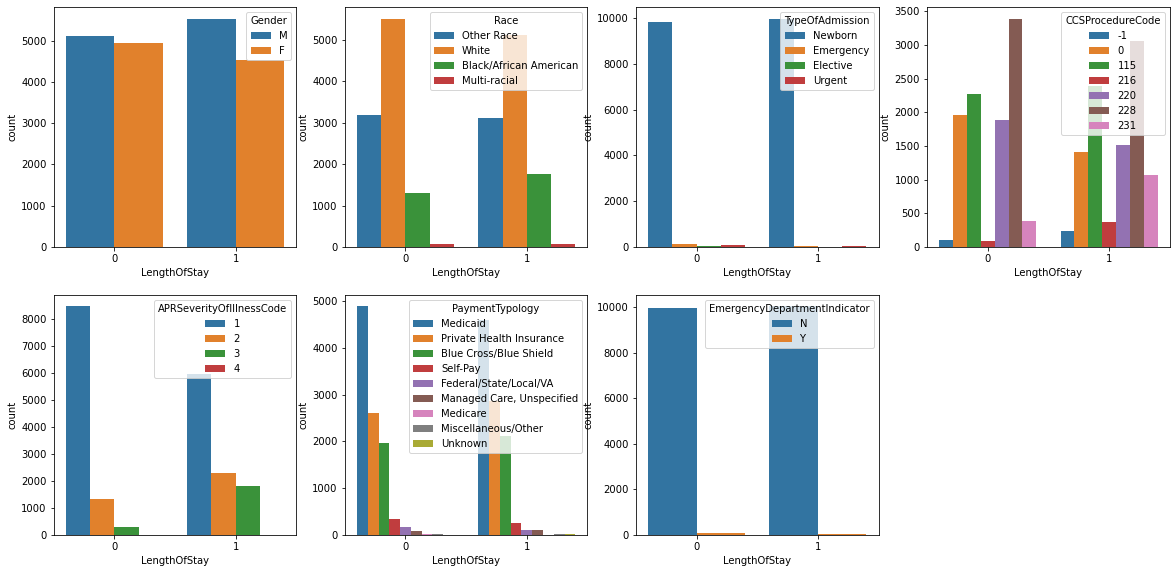

In [282]:
plt.figure(figsize=(20,15))
for i, col in enumerate(nominal_attributes):
    plt.subplot(3,4,i+1)
    sns.countplot(x="LengthOfStay", hue=col, data=downsampled)

### 6.5.2. Box plot

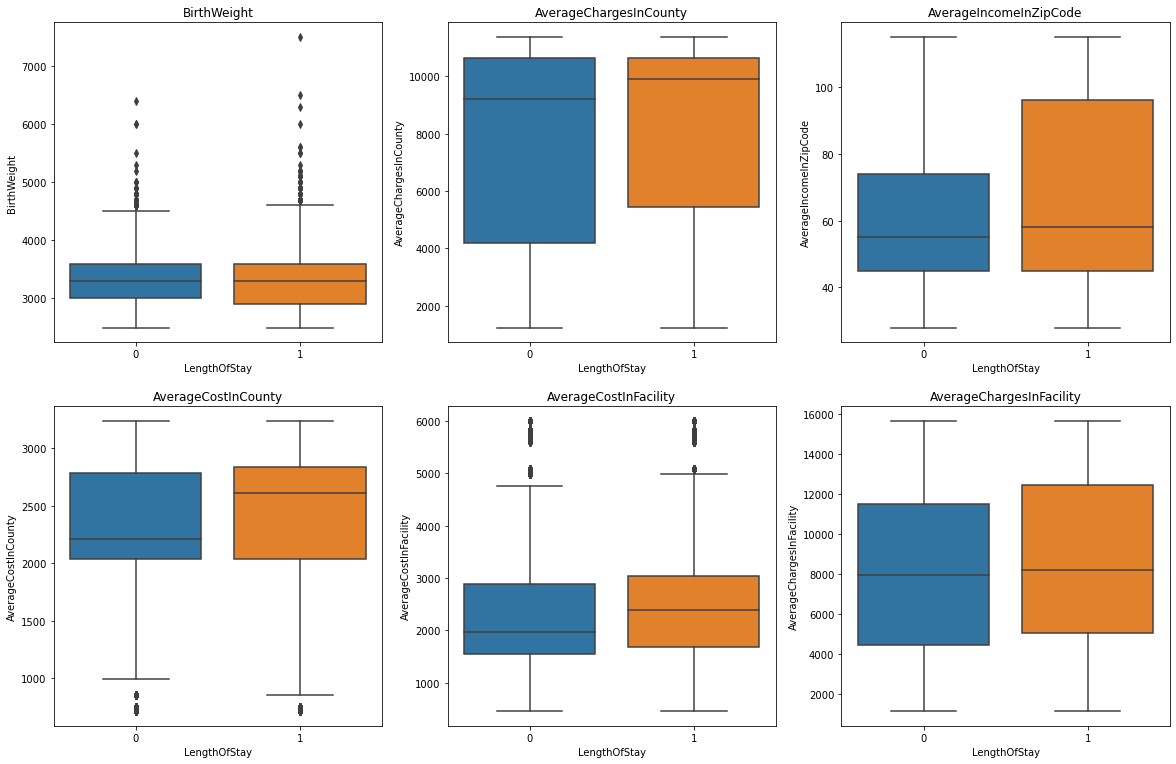

In [283]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical_attributes):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(y=col,x='LengthOfStay',data=downsampled)
    plt.title(col)

From above count and box plots, we can see that the distributions categoried by the "LengthOfStay" attribute of nominal and numerical attributes are similar, which means that those attributes are less likely to have a strong relationship with the "LengthOfStay" attribute.

## 6.6. Show the correlation map

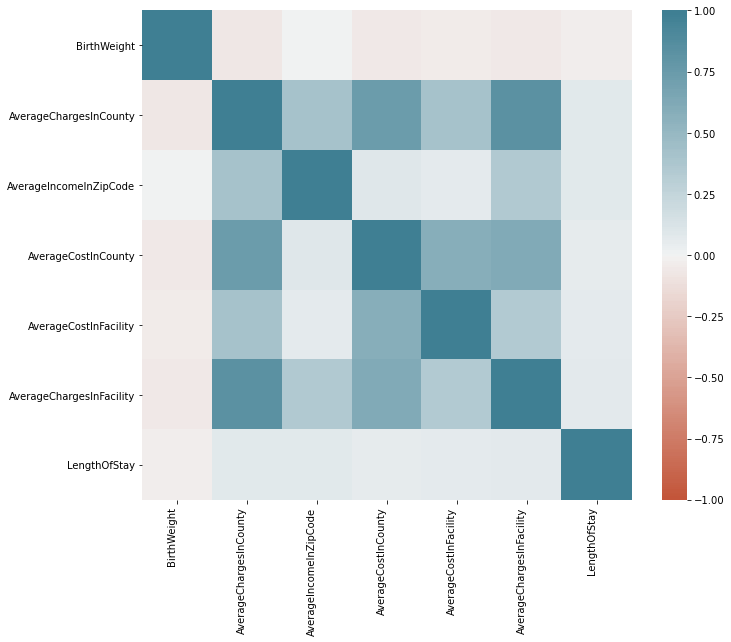

In [284]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data[numerical_attributes + ['LengthOfStay']].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

From the correlation map, we can see that those attributes have a weak relatioship with the "LengthOfStay" attribute.

# 7. Setting up the evaluation metric
Because the target attribute "LengthOfStay" is a imblanced and binary attribute, this notebook used the f1 score to evaluate the performance.

# 8. Select model
Because it is a category classification problem, this notebook used logistic regression and decision tree to do the classification job.

# 9. Experiment with Logistic Rgression
## 9.1. Copy data

In [285]:
data_for_logistical_rgression = downsampled.copy()

## 9.2. Data scaling

In [35]:
minmaxscaler = MinMaxScaler().fit(data_for_logistical_rgression.loc[:, numerical_attributes])
data_for_logistical_rgression.loc[:, numerical_attributes] = minmaxscaler.transform(data_for_logistical_rgression.loc[:, numerical_attributes])

## 9.3. One hot encoding

In [36]:
OneHotEncoder_logistic_regression = OneHotEncoder()
OneHotEncoder_logistic_regression.fit(data_for_logistical_rgression[nominal_attributes])

onehot_ = OneHotEncoder_logistic_regression.transform(data_for_logistical_rgression[nominal_attributes]).toarray()

j_index = 0
for i, col_name in enumerate(nominal_attributes):
    for j in range(len(OneHotEncoder_logistic_regression.categories_[i])):
        data_for_logistical_rgression[col_name + '_' + str(OneHotEncoder_logistic_regression.categories_[i][j])] = onehot_[:,j_index]
        j_index = j_index + 1

data_for_logistical_rgression.drop(nominal_attributes, inplace=True, axis=1)

## 9.4. Split

In [37]:
# 60/20/20
with pd.option_context('mode.chained_assignment', None):
    train_data_tmp, test_data_logistical_rgression = train_test_split(data_for_logistical_rgression, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data_logistical_rgression, val_data_logistical_rgression = train_test_split(train_data_tmp, test_size=0.25, 
                                            shuffle=True,random_state=0)

train_x = train_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
train_y = train_data_logistical_rgression[['LengthOfStay']].to_numpy()
val_x = val_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
val_y = val_data_logistical_rgression[['LengthOfStay']].to_numpy()
test_x = test_data_logistical_rgression.drop('LengthOfStay', axis=1).to_numpy()
test_y = test_data_logistical_rgression[['LengthOfStay']].to_numpy()

## 9.5. Training and Hyper-parameter tuning
This notebook used L2 regularization to penalize some weights to be zero because the attributes are weak related to the target.

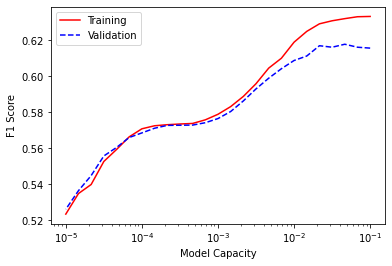

In [296]:
lambda_paras = np.logspace(1, 5, num=25)
train_performace = list()
valid_performace = list()

for lambda_para in lambda_paras:
    clf = LogisticRegression(random_state=0, penalty='l2', C = 1.0/lambda_para, solver='saga', 
                         max_iter=1000).fit(train_x, train_y.ravel())

    train_prediction = clf.predict(train_x)
    val_prediction = clf.predict(val_x)
    
    train_f1 = f1_score(train_y, train_prediction)
    val_f1 = f1_score(val_y, val_prediction)
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

The best lambda seems to be 0.04

## 9.6. Measure the performance of the Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0, penalty='l2', C = 0.04, solver='saga', 
                         max_iter=1000).fit(train_x, train_y.ravel())

train_prediction = clf.predict(train_x)
test_prediction = clf.predict(test_x)
    
print(classification_report(test_y, test_pred))
    
train_f1 = f1_score(train_y, train_prediction)
test_f1 = f1_score(val_y, test_prediction)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(test_f1))

disp = plot_confusion_matrix(clf, test_x, test_y, cmap=plt.cm.Blues)
plt.show()

1. The f1 score is around 0.6 for training and around 0.5 for testing. It means that this model is not good enough.
2. The precision for class 1 is 0.68. It means it can predicts 68 percent of true positive examples.
3. The recall for class 1 is 0.58. It means the positive examples it predict has 58 percent true positive examples.
4. Above all, the performance is mediocre but acceptable for this imbalanced data set.

# 10. Experiment with Decision Tree

## 10.1. Copy data

In [12]:
data_for_decision_tree = downsampled.copy()

## 10.2. One hot encoding

In [15]:
OneHotEncoder_decision_tree = OneHotEncoder()
OneHotEncoder_decision_tree.fit(data_for_decision_tree[nominal_attributes])

onehot_ = OneHotEncoder_decision_tree.transform(data_for_decision_tree[nominal_attributes]).toarray()

j_index = 0
for i, col_name in enumerate(nominal_attributes):
    for j in range(len(OneHotEncoder_decision_tree.categories_[i])):
        data_for_decision_tree[col_name + '_' + str(OneHotEncoder_decision_tree.categories_[i][j])] = onehot_[:,j_index]
        j_index = j_index + 1

data_for_decision_tree.drop(nominal_attributes, inplace=True, axis=1)

## 10.3. Split

In [16]:
with pd.option_context('mode.chained_assignment', None):
    train_data_tmp, test_data_decision_tree = train_test_split(data_for_decision_tree, test_size=0.2, 
                                              shuffle=True,random_state=0)
    
with pd.option_context('mode.chained_assignment', None):
    train_data_decision_tree, val_data_decision_tree = train_test_split(train_data_tmp, test_size=0.25, 
                                            shuffle=True,random_state=0)

train_decision_tree_x = train_data_decision_tree.drop('LengthOfStay', axis=1).to_numpy()
train_decision_tree_y = train_data_decision_tree['LengthOfStay'].to_numpy()
val_decision_tree_x = val_data_decision_tree.drop('LengthOfStay', axis=1).to_numpy()
val_decision_tree_y = val_data_decision_tree['LengthOfStay'].to_numpy()
test_decision_tree_x = test_data_decision_tree.drop('LengthOfStay', axis=1).to_numpy()
test_decision_tree_y = test_data_decision_tree['LengthOfStay'].to_numpy()

## 10.4. Training and Hyper-parameter tuning
### 10.4.1. Maximum depth tuning

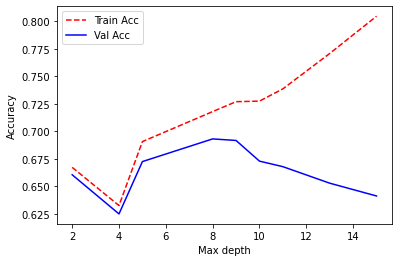

In [306]:
max_depths = [2,4,5,8,9,10,11,13,15]

train_hold = list()
val_hold = list()

for max_depth in max_depths:
    clf_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf_decision_tree = clf_decision_tree.fit(train_decision_tree_x, train_decision_tree_y.ravel())
    
    train_decision_tree_prediction = clf_decision_tree.predict(train_decision_tree_x)
    val_decision_tree_prediction = clf_decision_tree.predict(val_decision_tree_x)

    train_decision_tree_f1 = f1_score(train_decision_tree_y, train_decision_tree_prediction)
    val_decision_tree_f1 = f1_score(val_decision_tree_y, val_decision_tree_prediction)
    
    train_hold.append(train_decision_tree_f1)
    val_hold.append(val_decision_tree_f1)
    
plt.plot(max_depths, train_hold, 'r--')
plt.plot(max_depths, val_hold, 'b-')
plt.legend(['Train','Validation'])
plt.xlabel('Max depth')
plt.ylabel('F1 Score')
plt.show()

It seems that 8 is the best.
### 10.4.2. Post prune parameter tuning

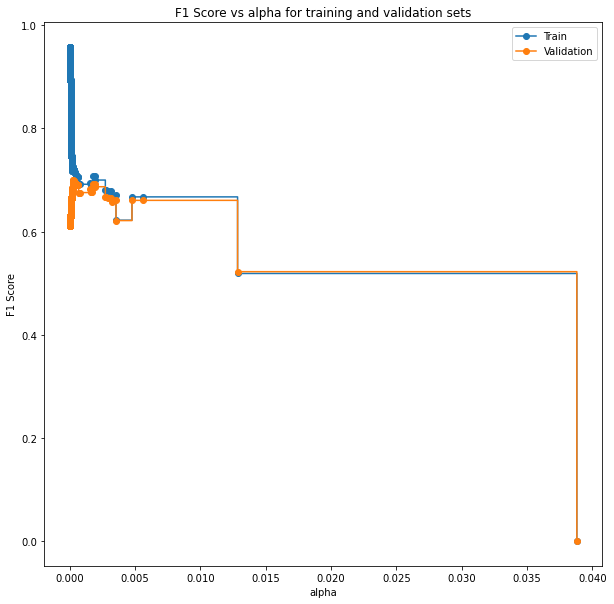

0.00026797352655740653


In [17]:
clf_decision_tree = tree.DecisionTreeClassifier(random_state=0)
path = clf_decision_tree.cost_complexity_pruning_path(train_decision_tree_x, train_decision_tree_y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

train_scores = list()
test_scores = list()
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(train_decision_tree_x, train_decision_tree_y.ravel())
    
    train_decision_tree_prediction = clf.predict(train_decision_tree_x)
    val_decision_tree_prediction = clf.predict(val_decision_tree_x)

    train_decision_tree_f1 = f1_score(train_decision_tree_y, train_decision_tree_prediction)
    val_decision_tree_f1 = f1_score(val_decision_tree_y, val_decision_tree_prediction)
    
    train_scores.append(train_decision_tree_f1)
    test_scores.append(val_decision_tree_f1)

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="Train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="Validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

best_ccp_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print(best_ccp_alpha)

It seems that 0.0003 is the best
### 10.4.3. Maximum leaf nodes tuning

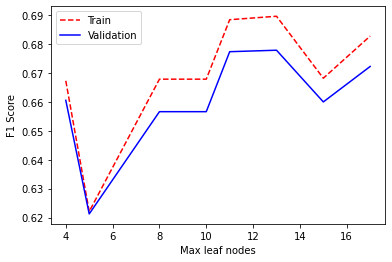

In [19]:
max_leaf_nodes = [4,5,8,9,10,11,13,15,17]

train_hold = list()
val_hold = list()

for leaf_nodes in max_leaf_nodes:
    clf_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=leaf_nodes)
    clf_decision_tree = clf_decision_tree.fit(train_decision_tree_x, train_decision_tree_y)
    
    train_decision_tree_prediction = clf_decision_tree.predict(train_decision_tree_x)
    val_decision_tree_prediction = clf_decision_tree.predict(val_decision_tree_x)

    train_decision_tree_acc = f1_score(train_decision_tree_y, train_decision_tree_prediction)
    val_decision_tree_acc = f1_score(val_decision_tree_y, val_decision_tree_prediction)
    
    train_hold.append(train_decision_tree_acc)
    val_hold.append(val_decision_tree_acc)
    
plt.plot(max_leaf_nodes, train_hold, 'r--')
plt.plot(max_leaf_nodes, val_hold, 'b-')
plt.legend(['Train','Validation'])
plt.xlabel('Max leaf nodes')
plt.ylabel('F1 Score')
plt.show()

It seems that 13 is the best
## 10.5. Measure the performance

              precision    recall  f1-score   support

           0       0.70      0.67      0.69      2005
           1       0.69      0.71      0.70      2023

    accuracy                           0.69      4028
   macro avg       0.69      0.69      0.69      4028
weighted avg       0.69      0.69      0.69      4028

Train F1-Score score: 0.718
Test F1-Score score: 0.699


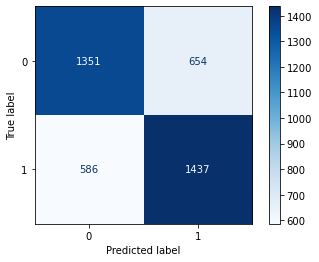

In [23]:
clf_decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf_decision_tree = clf_decision_tree.fit(train_decision_tree_x, train_decision_tree_y.ravel())

train_decision_tree_prediction = clf_decision_tree.predict(train_decision_tree_x)
test_decision_tree_prediction = clf_decision_tree.predict(test_decision_tree_x)

print(classification_report(test_decision_tree_y, test_decision_tree_prediction,))
    
train_decision_tree_f1 = f1_score(train_decision_tree_y, train_decision_tree_prediction)
test_decision_tree_f1 = f1_score(test_decision_tree_y, test_decision_tree_prediction)

print("Train F1-Score score: {:.3f}".format(train_decision_tree_f1))
print("Test F1-Score score: {:.3f}".format(test_decision_tree_f1))

disp = plot_confusion_matrix(clf_decision_tree, test_decision_tree_x, test_decision_tree_y, cmap=plt.cm.Blues)
plt.show()

1. The f1 score is higher than that of Logistic Regression.
2. The high (for this data set) precision and recall for both the two class means that it can differentiate true positive and negative examples with a reasonable accuracy.
3. From the confusion matrix, we can see that the predicted true positive and negiative examples have a higher percentage than the false positive and negative examples. It means that this model may work well on this data set.

## 10.6. Try Random Forest to see if the performance can be improved
While the decision tree is prone to over-fitting, the random forest can fix this problem and improve accuracy by using ensemble strategy. It is worth a try to do some experiment with the Random Forest algorithm.

Train Accuracy score: 0.572
Validation Accuracy score: 0.558
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      9921
           1       0.64      0.13      0.21      2072

    accuracy                           0.84     11993
   macro avg       0.74      0.56      0.56     11993
weighted avg       0.81      0.84      0.79     11993

Train F1-Score score: 0.255
Validation F1-Score score: 0.216


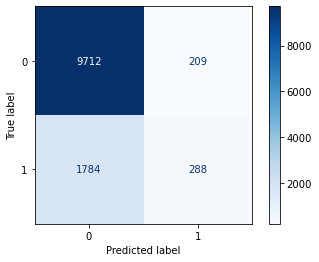

In [139]:
clf_random_forest = RandomForestClassifier(max_depth=8, random_state=0)
clf_random_forest.fit(train_decision_tree_x, train_decision_tree_y)

train_random_forest_prediction = clf_random_forest.predict(train_decision_tree_x)
val_random_forest_prediction = clf_random_forest.predict(val_decision_tree_x)
test_random_forest_prediction = clf_random_forest.predict(test_decision_tree_x)

train_random_forest_acc = balanced_accuracy_score(train_decision_tree_y, train_random_forest_prediction)
val_random_forest_acc = balanced_accuracy_score(val_decision_tree_y, val_random_forest_prediction)

print("Train Accuracy score: {:.3f}".format(train_random_forest_acc))
print("Validation Accuracy score: {:.3f}".format(val_random_forest_acc))

print(classification_report(test_decision_tree_y, test_random_forest_prediction,))
    
train_decision_tree_f1 = f1_score(train_decision_tree_y, train_random_forest_prediction)
val_decision_tree_f1 = f1_score(val_decision_tree_y, val_random_forest_prediction)

print("Train F1-Score score: {:.3f}".format(train_decision_tree_f1))
print("Validation F1-Score score: {:.3f}".format(val_decision_tree_f1))

disp = plot_confusion_matrix(clf_decision_tree, test_decision_tree_x, test_decision_tree_y, cmap=plt.cm.Blues)
plt.show()

# References
1. EliteDataScience. 2021. How to Handle Imbalanced Classes in Machine Learning. [online] Available at: <https://elitedatascience.com/imbalanced-classes> [Accessed 4 April 2021].